In [1]:
# Flujo de trabajo Ciencia de datos-Aprendizaje automático utilizando
#Pandas, NumPy, Matplotlib, scikit-learn y Seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Crear datos sintéticos con NumPy
np.random.seed(0) #Semilla para el generador de nº aleatorios

#np.random.randn que sigue una distribución normal estándar. Media=0. Desviacon estandar=1
#obtenemos 2 matrices bidimensionales con 50 filas y 2 columnas
X_clase1 = np.random.randn(50, 2) + np.array([2, 2])
X_clase2 = np.random.randn(50, 2) + np.array([-2, -2])


# Crear las etiquetas para cada clase
y_clase1 = np.ones(50) #array unidimensional con 50 ceros
y_clase2 = np.zeros(50)

# Combinar las clases y etiquetas
#concatenar los dos arrays
X = np.vstack([X_clase1, X_clase2]) #bidimensionales en uno 100x2
y = np.hstack([y_clase1, y_clase2]) #unidimensionales en otro 100

# Convertir datos a un DataFrame de Pandas
df = pd.DataFrame(X, columns=['Caracteristica1', 'Caracteristica2'])
df['Etiqueta'] = y

# Mostrar las primeras y últimas filas del DataFrame para inspección
df.head(100)

,Caracteristica1,Caracteristica2,Etiqueta
0,3.764052,2.400157,1.0
1,2.978738,4.240893,1.0
2,3.867558,1.022722,1.0
3,2.950088,1.848643,1.0
4,1.896781,2.410599,1.0
...,...,...,...
95,-3.292857,-1.732949,0.0
96,-2.039283,-3.168093,0.0
97,-1.476723,-2.171546,0.0
98,-1.228209,-1.176496,0.0


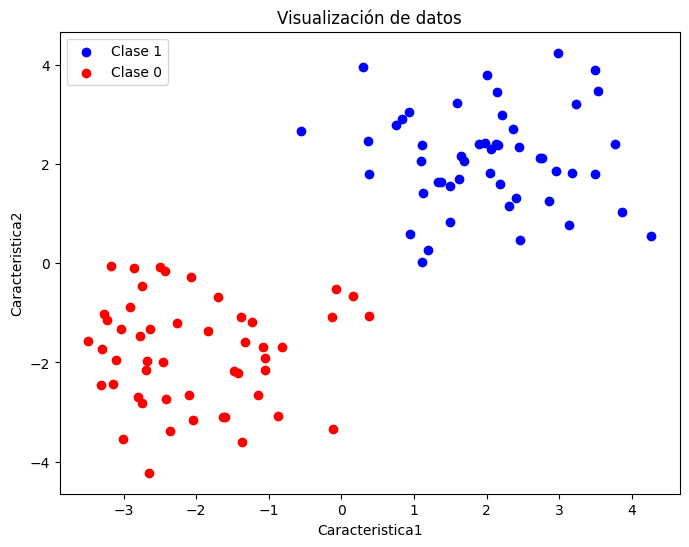

In [3]:
# Visualizar datos
plt.figure(figsize=(8, 6)) #ancho x alto
plt.scatter(X_clase1[:, 0], X_clase1[:, 1], c='b', label='Clase 1')
plt.scatter(X_clase2[:, 0], X_clase2[:, 1], c='r', label='Clase 0')
plt.xlabel('Caracteristica1')
plt.ylabel('Caracteristica2')
plt.legend()
plt.title('Visualización de datos')
plt.show()

# USAREMOS ESTO PARA ENTRENAR EL MODELO SVM

```python
# Crear las etiquetas para cada clase
y_clase1 = np.ones(50) #array unidimensional con 50 ceros
y_clase2 = np.zeros(50)

# Combinar las clases y etiquetas
#concatenar los dos arrays
X = np.vstack([X_clase1, X_clase2]) #bidimensionales en uno 100x2
y = np.hstack([y_clase1, y_clase2]) #unidimensionales en otro 100

<HR>

# ¿Qué es SVM?
Es un algoritmo de aprendizaje automático supervisado que analiza un conjunto de datos de entrenamiento y los clasifica en diferentes categorías, maximizando la separación entre ellas con un hiperplano

### Ventajas de SVM:
- Alta precisión
- Utilidad en múltiples dominios
- Efectivo para datos no lineales

Un hiperplano, es una superficie N-1 dimensional que divide el espacio de características en dos regiones.
El término N-1 se refiere al hecho de que el hiperplano divide un espacio de características de N dimensiones en dos regiones

In [6]:
# Dividir datos en conjuntos de entrenamiento y prueba para evitar el overfitting (sobreajuste)
#pasamos dos arrays X e y, testsize=20% y randomstate=semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo SVM
#SVC es lineal, busque un hiperplano
#C=1 ayuda a equilibrar la complejidad del hiperplano y nivel de tolerancia
model = SVC(kernel='linear', C=1)
#Ejemplos de uso: regersion lineal, clasificacion, agrupacion
model.fit(X_train, y_train)#fit() usamos el 80% para entrenar, ajusta los datos 

# Predecir etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Crear un DataFrame con las etiquetas reales y las predichas
df = pd.DataFrame({'Etiquetas Reales': y_test, 'Etiquetas Predichas': y_pred})

# Mostrar el DataFrame
print(df)

    Etiquetas Reales  Etiquetas Predichas
0                1.0                  1.0
1                0.0                  0.0
2                1.0                  1.0
3                0.0                  0.0
4                0.0                  0.0
5                0.0                  0.0
6                1.0                  1.0
7                0.0                  0.0
8                0.0                  0.0
9                0.0                  0.0
10               0.0                  0.0
11               0.0                  0.0
12               0.0                  0.0
13               1.0                  1.0
14               1.0                  1.0
15               1.0                  1.0
16               1.0                  1.0
17               1.0                  1.0
18               1.0                  1.0
19               1.0                  1.0


## Matriz de confusión
**Es una herramienta fundamental en evaluación de modelos de clasificación. Permite visualizar el rendimiento del modelo y comprender los aciertos y errores en la predicción**  

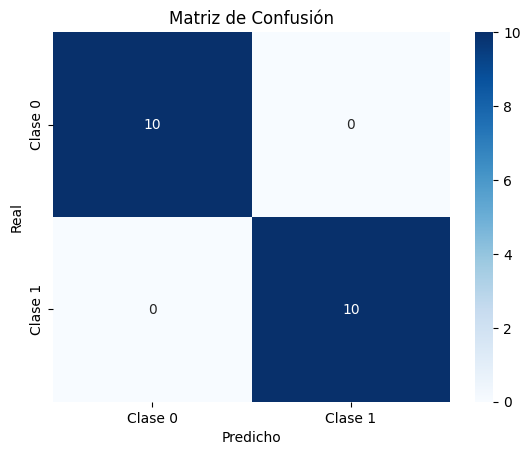

In [8]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
 
# Visualizar la matriz de confusión con Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

- Predice clase0 y valor real clase0 -> Verdadero Negativo (10 Nº de casos clase0_real=clase0_predicha)
- Predice clase0 y valor real clase1 -> Falso Negativo (El modelo erroneamente predijo clase1 cuando la eiiqueta verdadera era clase0)
- Predice clase1 y valor real clase0 -> Falso Positivo (Perdijo clase0 cuando era clase1)
- Predice clase1 y valor real clase1 -> Verdadero Positivo (Etiqueta verdadera predicha y real son clase1)

Negativo = clase0

Positivo = clase1